# Libraries

In [1]:
import sys
import sklearn
%matplotlib inline
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.manifold import Isomap, SpectralEmbedding, LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Version

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Dataset

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

In [4]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

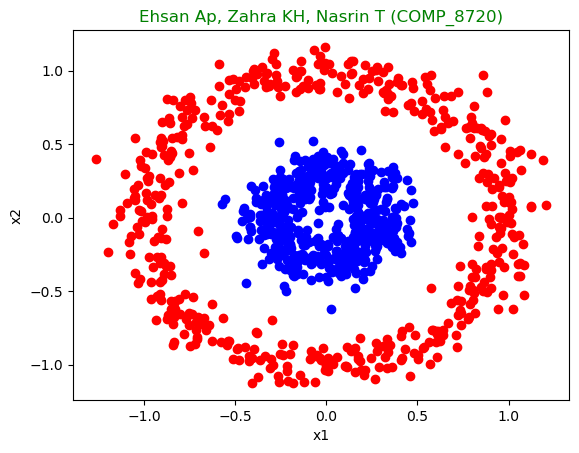

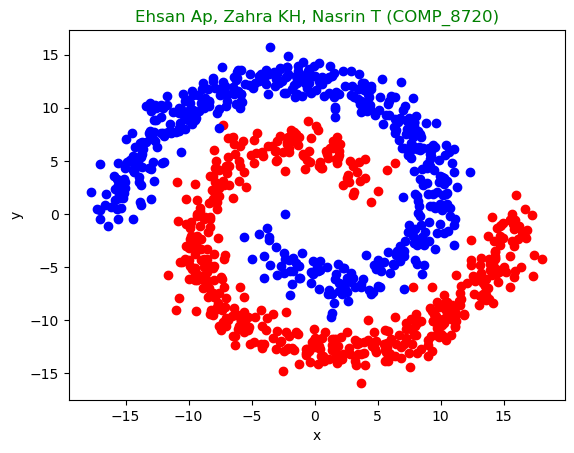

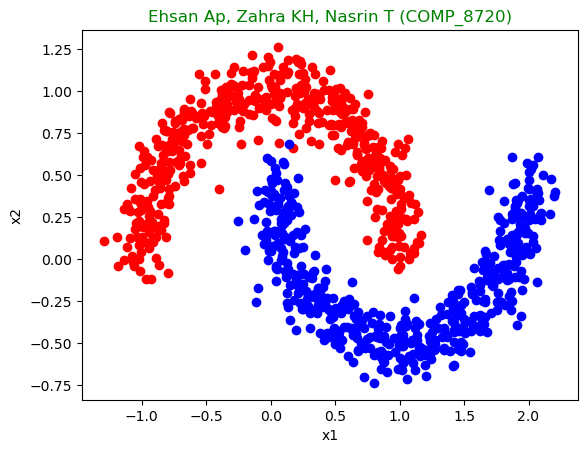

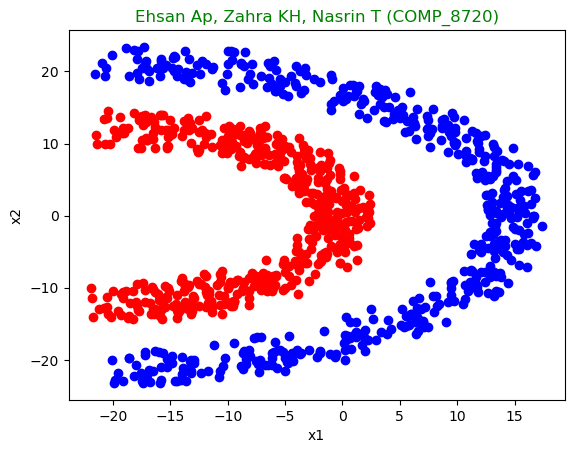

In [5]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

In [7]:
def calculate_xb_index(X, y, wcss):
    n_samples, n_features = X.shape
    centers = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centers[i] = np.mean(X[y == i], axis=0)
    d = np.sqrt(np.sum((X - centers[y]) ** 2, axis=1))
    return np.sum((d ** 2) / (n_samples * wcss))


def calculate_wcss(X, y):
    wcss = 0
    for k in np.unique(y):
        mask = y == k
        centroid = np.mean(X[mask], axis=0)
        distance = np.sum((X[mask] - centroid) ** 2)
        wcss += distance
    return wcss


def calculate_i_index(X, y):
    wcss = calculate_wcss(X, y)
    n_samples, n_features = X.shape
    n_clusters = len(np.unique(y))
    s = 1 - silhouette_score(X, y)
    if n_clusters > 1:
        return s * np.sqrt(wcss / (n_samples * (n_clusters - 1)))
    else:
        return np.nan

# Circle

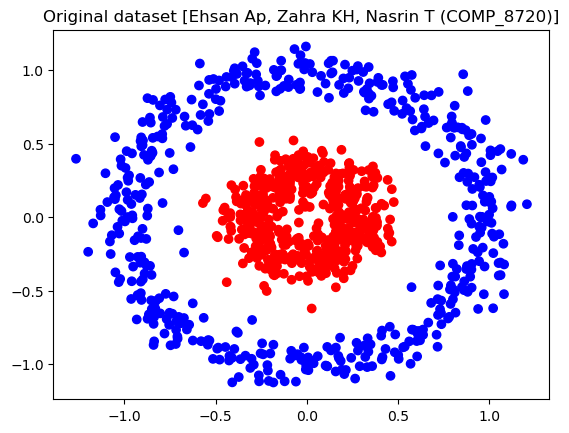

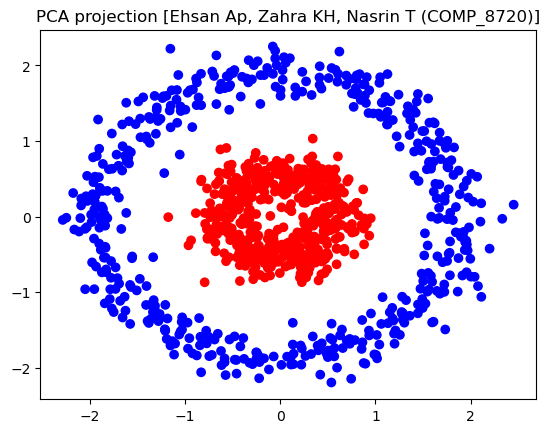

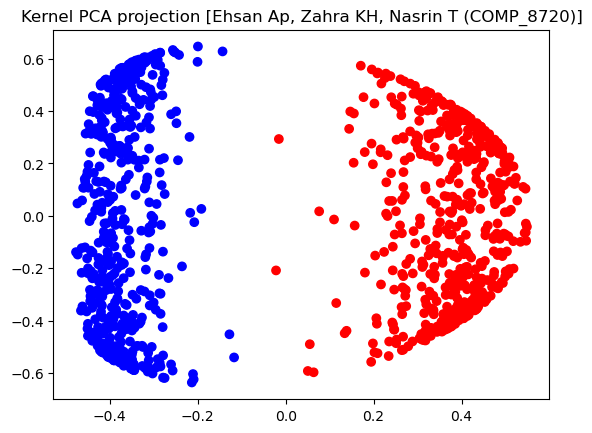

In [43]:
X = circle_csv[['x1', 'x2']]
y = circle_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

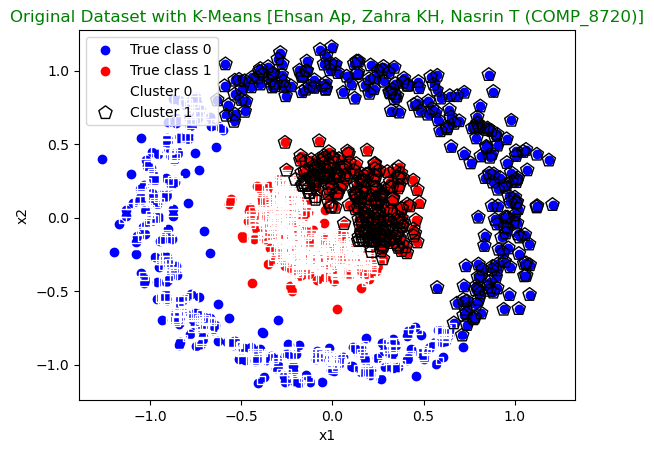

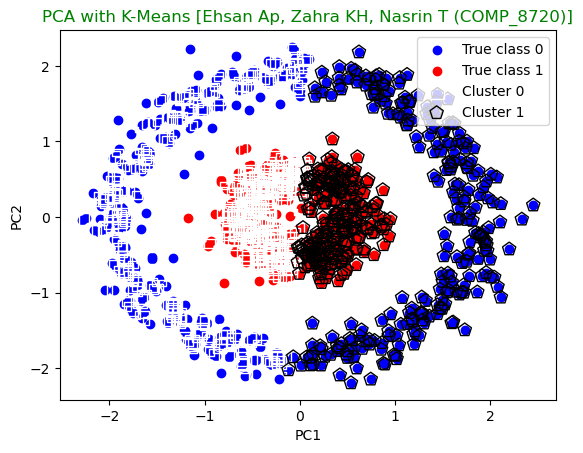

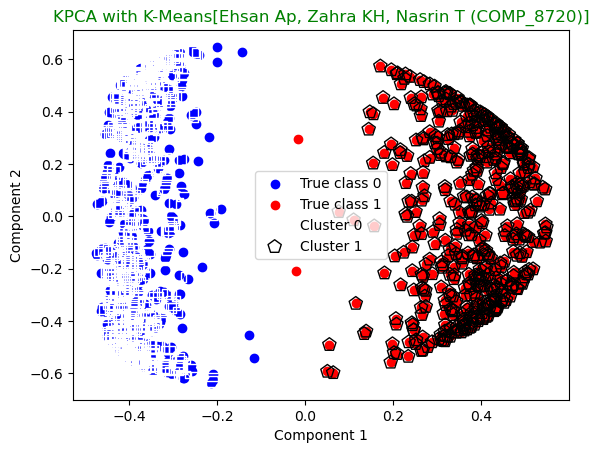

In [44]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [45]:
y_pred_pca = kmeans_pca.predict(X_pca)

y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 2
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA   Kernel PCA
0       Davies-Bouldin    1.309131     0.885971
1    Calinski-Harabasz  461.770299  1033.502329
2           Silhouette    0.290160     0.514921
3  Adjusted Rand Index   -0.000986     0.992008
4       Xie-Beni Index    0.001000     0.001000
5              Index I    0.830039     0.176207


# Moons

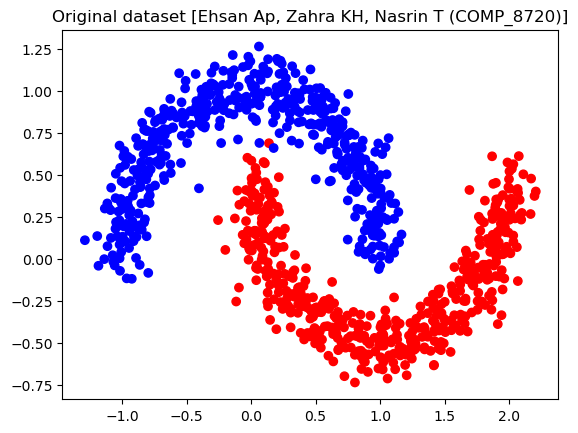

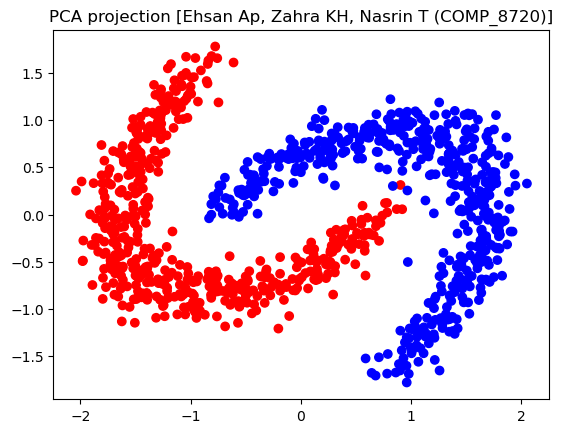

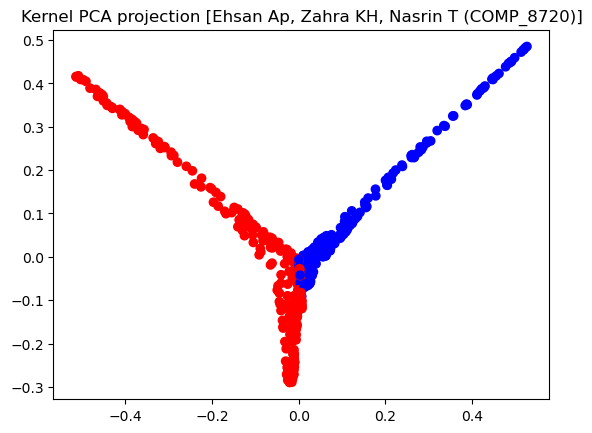

In [36]:
X = moons_csv[['x1', 'x2']]
y = moons_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=40)
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

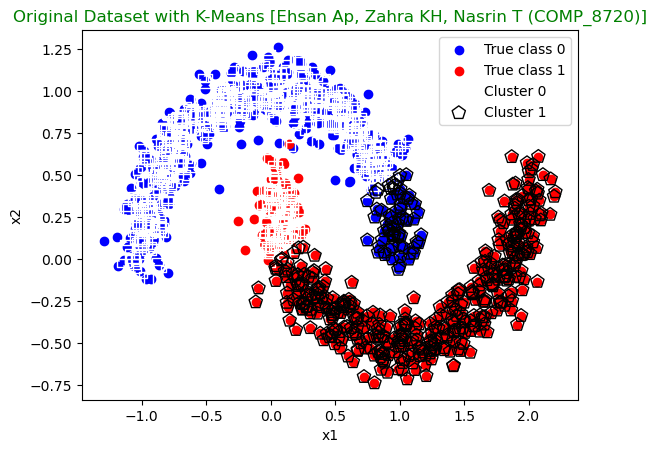

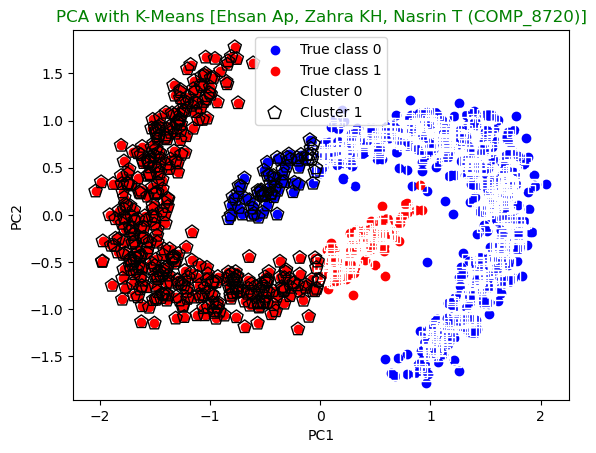

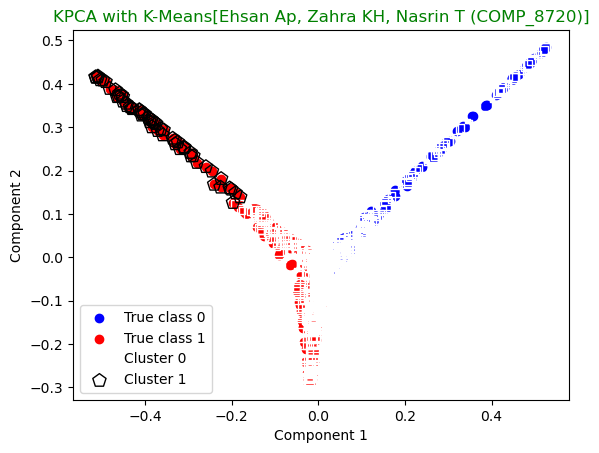

In [37]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [13]:
data = moons_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=40)
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric          PCA  Kernel PCA
0       Davies-Bouldin     0.816856    0.362532
1    Calinski-Harabasz  1346.593923  714.992649
2           Silhouette     0.488802    0.765526
3  Adjusted Rand Index     0.486690    0.014177
4       Xie-Beni Index     0.001000    0.001000
5              Index I     0.471668    0.033358


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Spiral

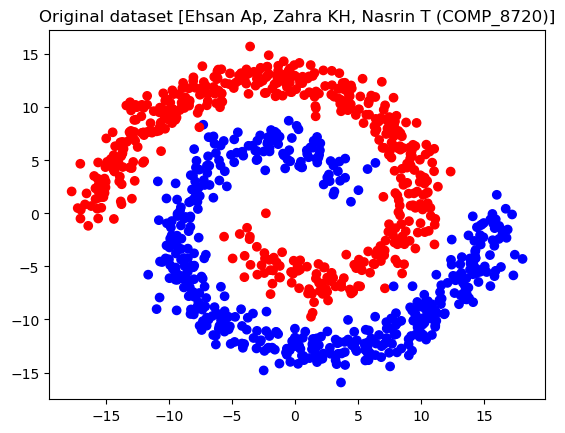

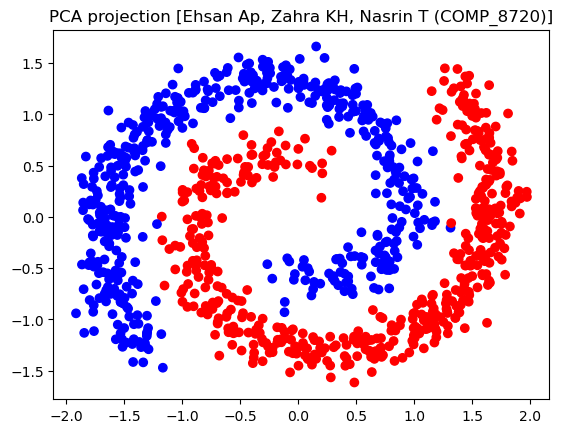

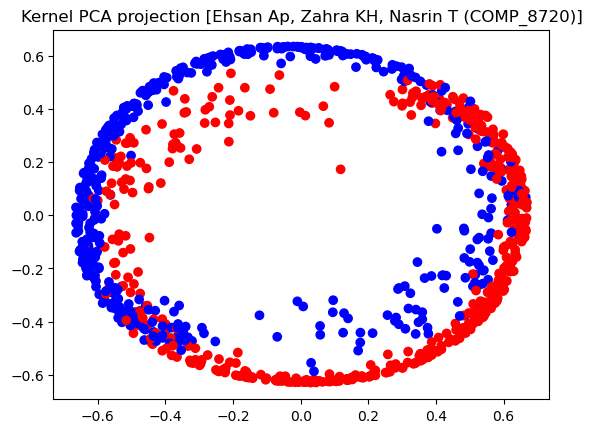

In [38]:
X = spiral_csv[['x', 'y']]
y = spiral_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

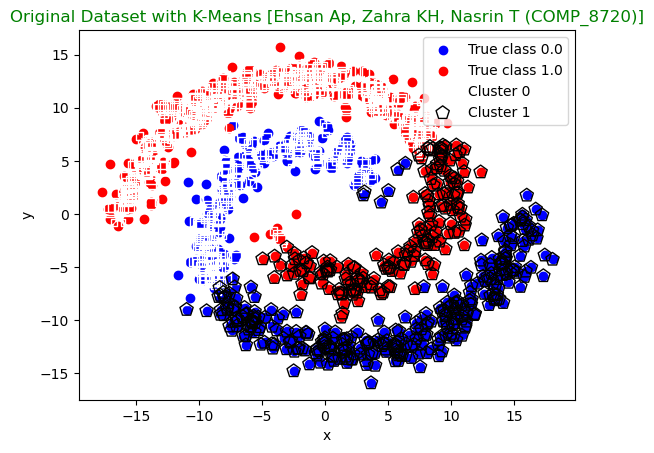

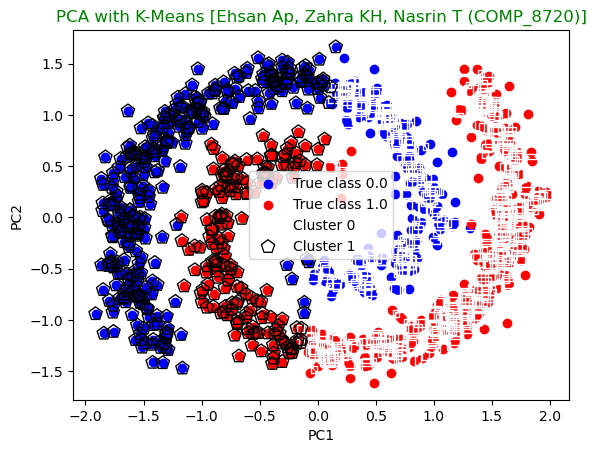

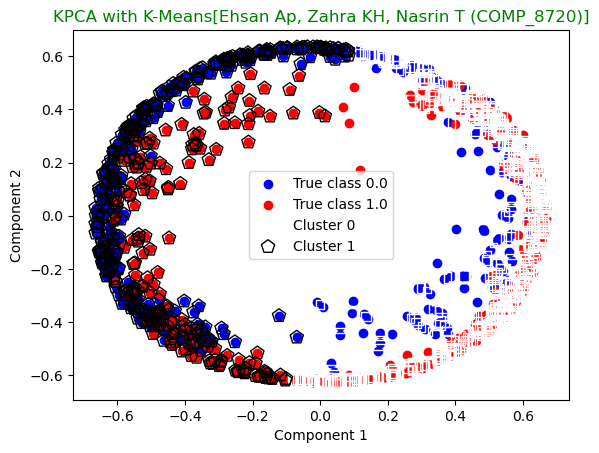

In [39]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x'], X[mask]['y'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x'], X[mask]['y'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [16]:
data = spiral_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    0.949054    0.963431
1    Calinski-Harabasz  956.888294  923.864099
2           Silhouette    0.436351    0.464943
3  Adjusted Rand Index    0.084347    0.149693
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.569545    0.236034


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Halfkernel

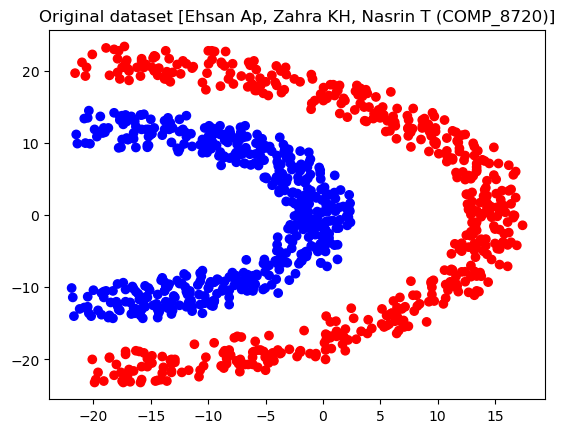

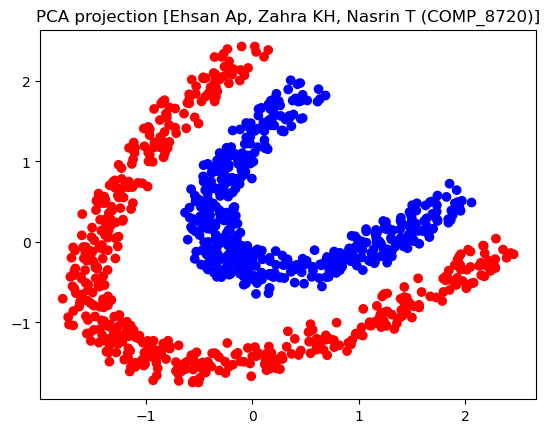

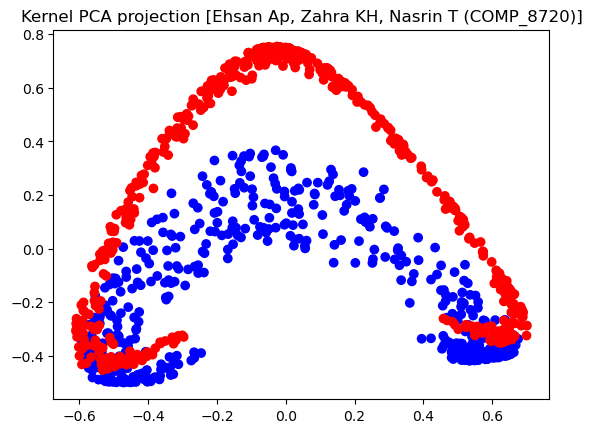

In [40]:
X = halfkernel_csv[['x1', 'x2']]
y = halfkernel_csv['label']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr')
plt.title('Original dataset [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr')
plt.title('PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='bwr')
plt.title('Kernel PCA projection [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]')
plt.show()

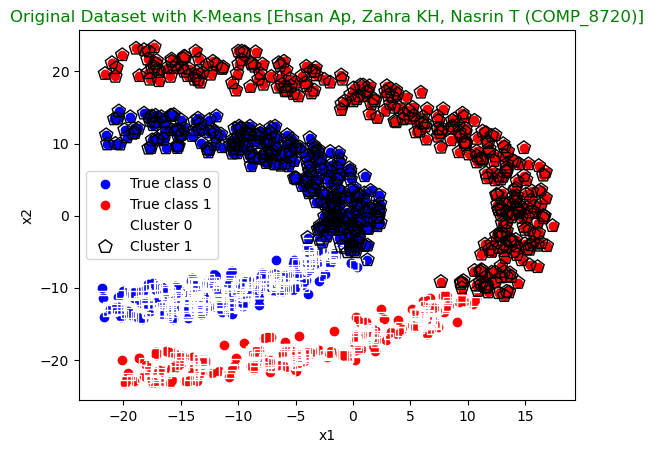

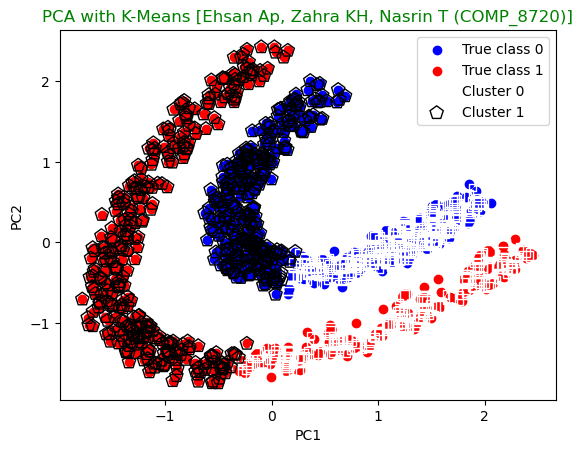

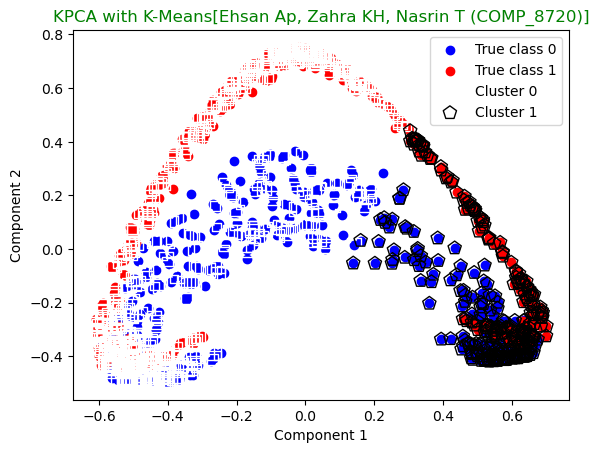

In [41]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_std)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans.labels_ == label
    ax.scatter(X[mask]['x1'], X[mask]['x2'], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
plt.title("Original Dataset with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=0)
kmeans_pca.fit(X_pca)

fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_pca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_pca.labels_ == label
    ax.scatter(X_pca[mask][:, 0], X_pca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.title("PCA with K-Means [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_kpca = KMeans(n_clusters=2, random_state=0)
kmeans_kpca.fit(X_kpca)

true_colors = ['blue', 'red']
cluster_markers = ['s', 'p']
fig, ax = plt.subplots()
for label, color in zip(y.unique(), true_colors):
    mask = y == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], c=color, label=f'True class {label}')
for label, marker, edgecolor in zip(set(kmeans_kpca.labels_), cluster_markers, ['white', 'black']):
    mask = kmeans_kpca.labels_ == label
    ax.scatter(X_kpca[mask][:, 0], X_kpca[mask][:, 1], marker=marker, s=100, edgecolors=edgecolor, facecolors='none',
               label=f'Cluster {label}')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend()
plt.title("KPCA with K-Means[Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]", color='green')
plt.show()

In [19]:
data = halfkernel_csv

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_std)

kmeans_pca = KMeans(n_clusters=2, random_state=42)
kmeans_pca.fit(X_pca)
y_pred_pca = kmeans_pca.predict(X_pca)

kmeans_kpca = KMeans(n_clusters=2, random_state=42)
kmeans_kpca.fit(X_kpca)
y_pred_kpca = kmeans_kpca.predict(X_kpca)

db_score_pca = davies_bouldin_score(X_pca, y_pred_pca)
db_score_kpca = davies_bouldin_score(X_kpca, y_pred_kpca)
ch_score_pca = calinski_harabasz_score(X_pca, y_pred_pca)
ch_score_kpca = calinski_harabasz_score(X_kpca, y_pred_kpca)
silhouette_pca = silhouette_score(X_pca, y_pred_pca)
silhouette_kpca = silhouette_score(X_kpca, y_pred_kpca)
ari_pca = adjusted_rand_score(y, y_pred_pca)
ari_kpca = adjusted_rand_score(y, y_pred_kpca)

n_clusters = 3
wcss_pca = kmeans_pca.inertia_
wcss_kpca = kmeans_kpca.inertia_

xb_score_pca = calculate_xb_index(X_pca, y_pred_pca, wcss_pca)
xb_score_kpca = calculate_xb_index(X_kpca, y_pred_kpca, wcss_kpca)
i_score_pca = calculate_i_index(X_pca, y_pred_pca)
i_score_kpca = calculate_i_index(X_kpca, y_pred_kpca)

scores = pd.DataFrame({
    'Metric': ['Davies-Bouldin', 'Calinski-Harabasz', 'Silhouette', 'Adjusted Rand Index', 'Xie-Beni Index', 'Index I'],
    'PCA': [db_score_pca, ch_score_pca, silhouette_pca, ari_pca, xb_score_pca, i_score_pca],
    'Kernel PCA': [db_score_kpca, ch_score_kpca, silhouette_kpca, ari_kpca, xb_score_kpca, i_score_kpca]
})
print(scores)

                Metric         PCA  Kernel PCA
0       Davies-Bouldin    1.024780    0.832573
1    Calinski-Harabasz  629.925850  828.010429
2           Silhouette    0.385213    0.475486
3  Adjusted Rand Index    0.000116    0.003203
4       Xie-Beni Index    0.001000    0.001000
5              Index I    0.680750    0.227332


/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


# Applying On S_Shape

In [20]:
X_s_shape, y_s_shape = make_s_curve(n_samples=1500, random_state=0)

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   0.136056             0.066848  0.609413
7.0   0.059195             0.320675  0.112618
12.0  0.058794             0.408770  0.074167
17.0  0.059756             0.434488  0.091176

Best K values for each method:
Isomap                 12.0
Laplacian Eigenmaps     3.0
LLE                    12.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_9548/2801184888.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

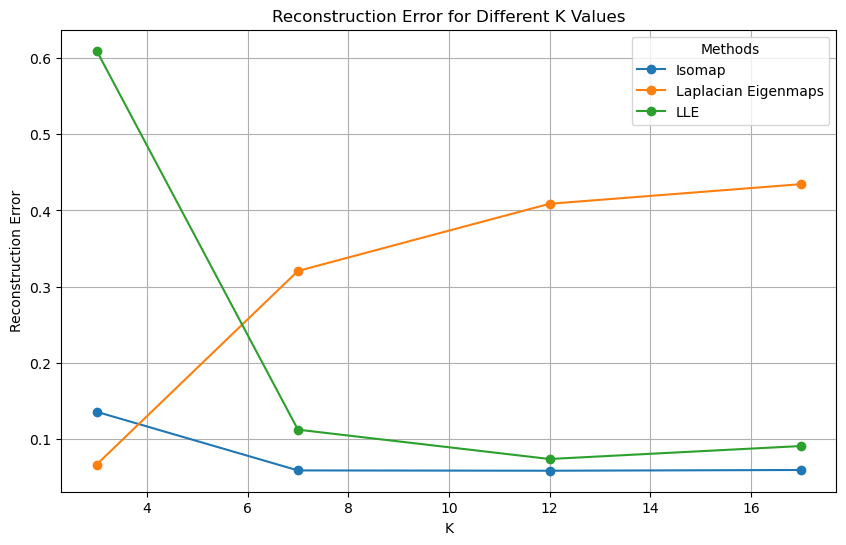

In [21]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return np.mean(np.linalg.norm(X_original - X_reconstructed, axis=1))


def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 7, 12, 17]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_s_shape, y_s_shape, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Different K Values")
plt.legend(title="Methods")
plt.grid()
plt.show()

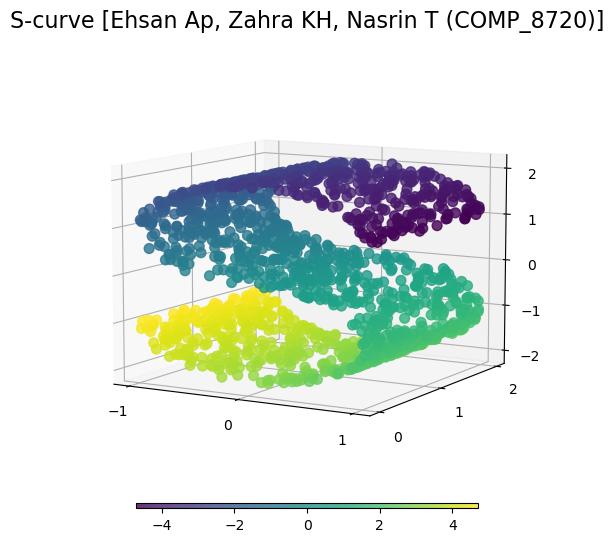

In [22]:
from matplotlib import ticker
from sklearn import manifold, datasets

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)


def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "S-curve [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

In [23]:
n_neighbors = 12
n_components = 2

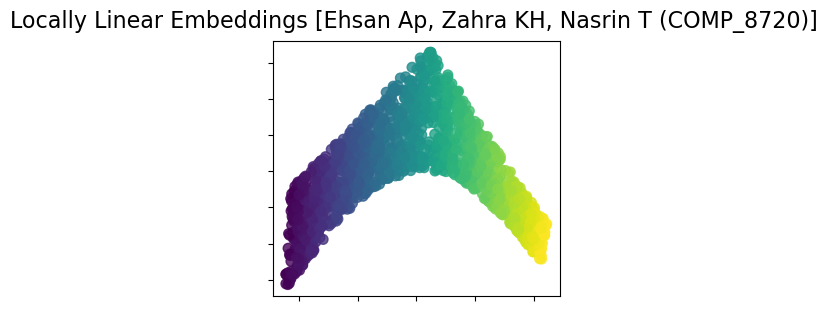

In [24]:
params = {
    "n_neighbors": 12,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

plot_2d(S_standard, S_color, "Locally Linear Embeddings [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

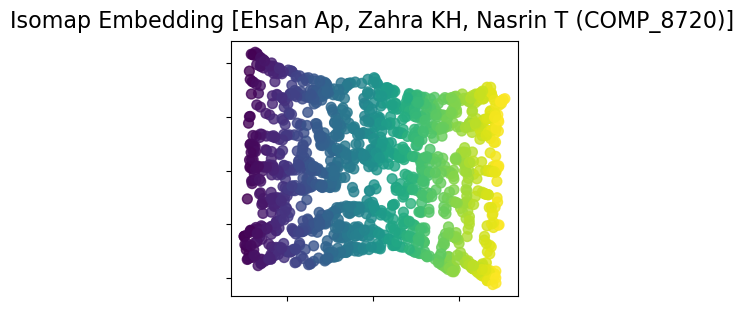

In [25]:
isomap = manifold.Isomap(n_neighbors=7, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

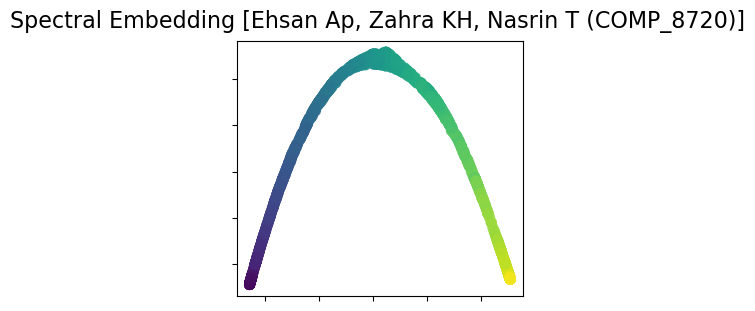

In [26]:
spectral = manifold.SpectralEmbedding(n_components=n_components, n_neighbors=10)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

# Applying On Swiss_Role

In [27]:
X_swiss_roll, y_swiss_roll = make_swiss_roll(n_samples=1000, random_state=0)

/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/ehsanap/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_

        Isomap  Laplacian Eigenmaps       LLE
K                                            
3.0   1.159390             0.783177  4.540759
5.0   0.718989             2.782891  3.029046
10.0  0.740427             4.490249  0.801927
15.0  0.746860             4.735062  0.965786
20.0  1.672732             3.734307  5.754626
30.0  5.006830             3.350727  4.053217

Best K values for each method:
Isomap                  5.0
Laplacian Eigenmaps     3.0
LLE                    10.0
dtype: float64


/var/folders/4p/xdy_sybn0wdgj2pz874zr0f00000gn/T/ipykernel_9548/853364783.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)


<Figure size 640x480 with 0 Axes>

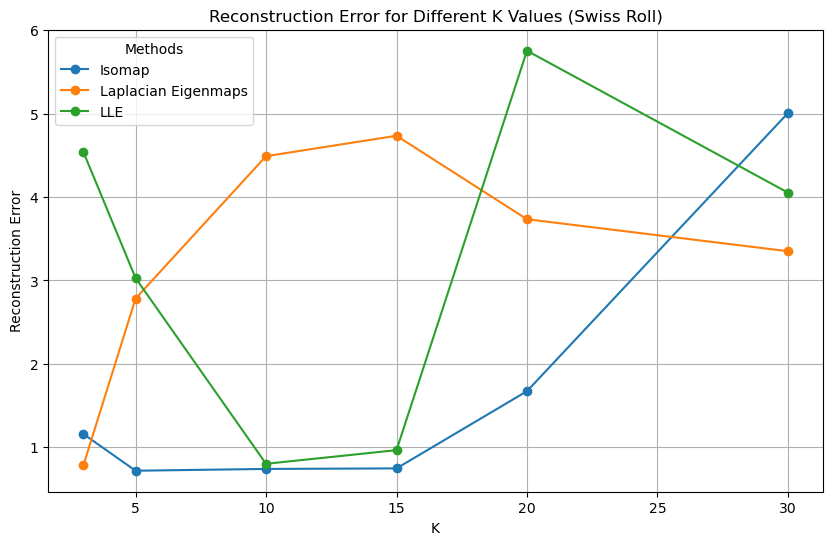

In [28]:
def reconstruction_error(X_original, X_transformed, n_neighbors):
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_transformed, X_original)
    X_reconstructed = knn.predict(X_transformed)
    return np.mean(np.linalg.norm(X_original - X_reconstructed, axis=1))


def apply_manifold_learning(X, y, k):
    methods = {
        "Isomap": Isomap(n_neighbors=k, n_components=n_components),
        "Laplacian Eigenmaps": SpectralEmbedding(n_components=n_components, affinity='nearest_neighbors',
                                                 n_neighbors=k),
        "LLE": LocallyLinearEmbedding(n_neighbors=k, n_components=n_components)
    }

    errors = {}
    for method_name, method in methods.items():
        X_transformed = method.fit_transform(X)
        error = reconstruction_error(X, X_transformed, k)
        errors[method_name] = error

    return errors


n_components = 2
k_values = [3, 5, 10, 15, 20, 30]

comparison_table = pd.DataFrame(columns=["K", "Isomap", "Laplacian Eigenmaps", "LLE"])

for k in k_values:
    errors = apply_manifold_learning(X_swiss_roll, y_swiss_roll, k)
    comparison_table = comparison_table.append({"K": k, **errors}, ignore_index=True)

comparison_table.set_index("K", inplace=True)
print(comparison_table)

best_k_values = comparison_table.idxmin()
print("\nBest K values for each method:")
print(best_k_values)

plt.figure()
comparison_table.plot(marker='o', figsize=(10, 6))
plt.xlabel("K")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error for Different K Values (Swiss Roll)")
plt.legend(title="Methods")
plt.grid()
plt.show()

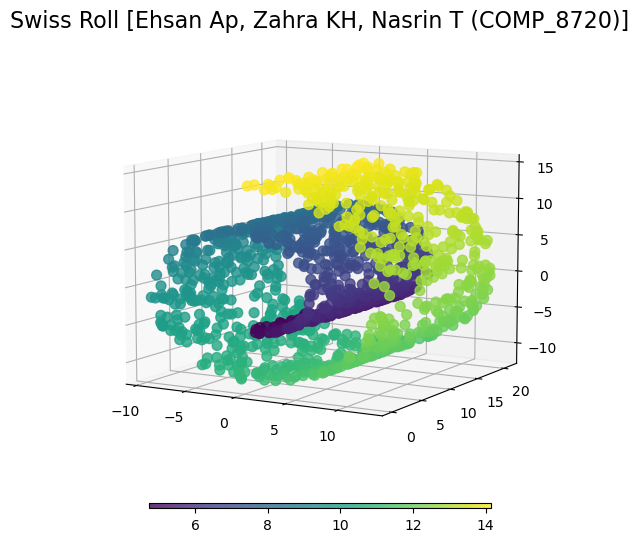

In [29]:
n_samples = 1500
swiss_roll, swiss_roll_color = datasets.make_swiss_roll(n_samples, random_state=0)


def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(5))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(swiss_roll, swiss_roll_color, "Swiss Roll [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

In [30]:
n_neighbors = 12
n_components = 2

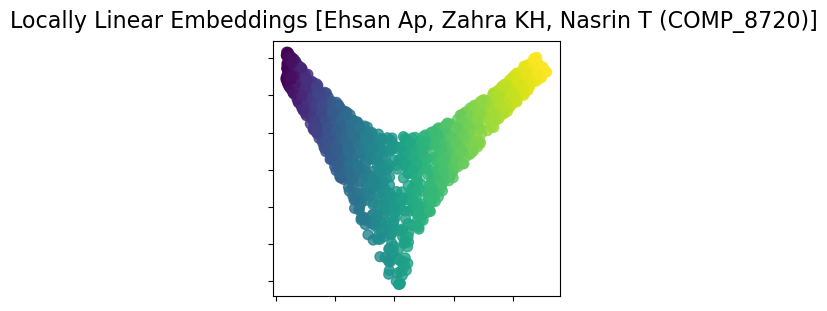

In [31]:
params = {
    "n_neighbors": 10,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(swiss_roll)
plot_2d(S_standard, swiss_roll_color, "Locally Linear Embeddings [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

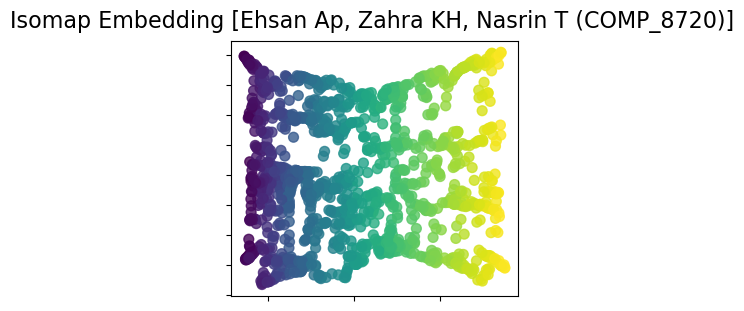

In [32]:
isomap = manifold.Isomap(n_neighbors=5, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(swiss_roll)

plot_2d(S_isomap, swiss_roll_color, "Isomap Embedding [Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)]")

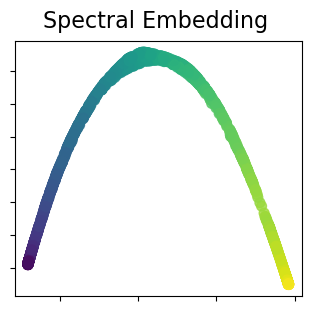

In [33]:
spectral = manifold.SpectralEmbedding(n_components=2, n_neighbors=20)
swiss_roll_spectral = spectral.fit_transform(swiss_roll)

plot_2d(swiss_roll_spectral, swiss_roll_color, "Spectral Embedding")